# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [4]:
df=pd.read_csv("revenue_prediction.csv")

In [5]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


## Examining the null values 

In [7]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

 ##so there are no null values in the data  

## Droping irrelevent columns

In [11]:
df=df.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])


In [12]:
df.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [13]:
df.tail()

,Order_Placed,Revenue
95,1.1,1270499
96,6.3,6412623
97,6.2,6694797
98,2.1,2344689
99,4.4,4567678


In [14]:
## Creating independent features and dependent variable

In [15]:
x=df.iloc[:,:-1]

In [16]:
print(x)

    Order_Placed
0            5.5
1            6.8
2            1.9
3            2.5
4            4.2
..           ...
95           1.1
96           6.3
97           6.2
98           2.1
99           4.4

[100 rows x 1 columns]


In [19]:
y=df.iloc[:,-1]

In [20]:
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Spliting the dataset into train and test model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
print(x_train)

    Order_Placed
55           6.8
88           1.9
26           2.1
42           4.8
69           3.3
..           ...
60           3.0
71           4.0
14           1.8
92           6.5
51           3.1

[80 rows x 1 columns]


In [29]:
x_test

,Order_Placed
83,5.7
53,5.4
70,3.8
45,3.6
44,4.0
39,3.7
22,3.8
80,3.5
10,3.6
0,5.5


In [31]:
y_train


55    6941173
88    2025297
26    2967425
42    4952255
69    3452382
       ...   
60    3164972
71    4136425
14    1099097
92    6782425
51    3273041
Name: Revenue, Length: 80, dtype: int64

In [32]:
y_test

83    5966193
53    5595267
70    3982767
45    3752885
44    4264176
39    3818055
22    4956086
80    3727364
10    3945135
0     5953753
18    4937526
30    2408199
73    3347767
33    2371202
90    3426169
4     4816715
76    4590423
77    1904842
12    2234634
31    2358644
Name: Revenue, dtype: int64

# LINEAR REGRESSION

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=model.predict(x_test)

In [38]:
y_pred

array([6351103.23642516, 5984998.65773576, 4032440.90472562,
       3788371.18559936, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559936,
       6107033.5172989 , 5740928.93860949, 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

In [39]:
## VISUALIZATION OF training set

Text(0.5, 1.0, 'ORDER VS REVENUE')

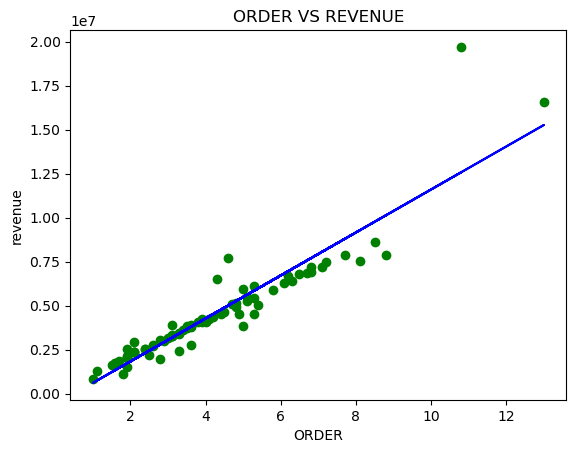

In [46]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,model.predict(x_train),color="blue")
plt.xlabel("ORDER")
plt.ylabel("revenue")
plt.title("ORDER VS REVENUE")

Text(0, 0.5, 'Revenue')

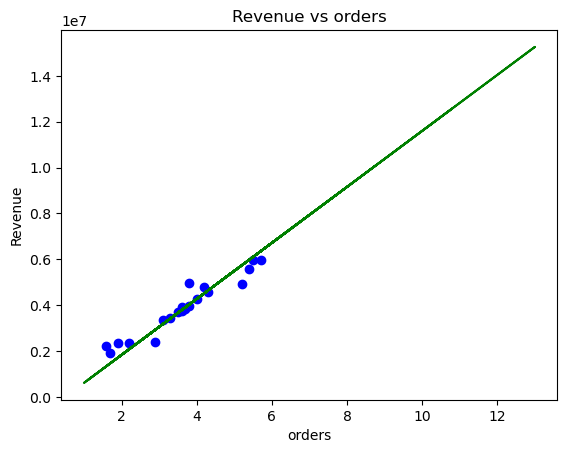

In [47]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,model.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

# ACCURACY OF MODEL

In [56]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_pred,y_test)*100

91.09612329066815